In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('melbourne_data.csv', parse_dates = ['Date'], dayfirst= True)

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not availa

Type: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhoial.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [3]:
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [5]:
data.dropna(subset = ['Car', 'CouncilArea'], inplace = True)
data = data.drop(columns = ['BuildingArea', 'YearBuilt'])

In [6]:
for column in data.select_dtypes(include='object').columns:
    unique_values = data[column].unique()
    if data[column].nunique() < 10:
        print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Type': ['h' 'u' 't']
Unique values in 'Method': ['S' 'SP' 'PI' 'VB' 'SA']
Unique values in 'Regionname': ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


In [7]:
from sklearn.preprocessing import  OrdinalEncoder

In [8]:
data_encode = data.copy()
categorical_cols = [col for col in data_encode.columns
                   if data_encode[col].dtype == 'object'
                   and data_encode[col].nunique() < 10]

ordinal_encoder = OrdinalEncoder()
data_encode[categorical_cols] = ordinal_encoder.fit_transform(data_encode[categorical_cols])

In [9]:
data_encode.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,0.0,1480000.0,1.0,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,2.0,4019.0
1,Abbotsford,25 Bloomburg St,2,0.0,1035000.0,1.0,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,2.0,4019.0
2,Abbotsford,5 Charles St,3,0.0,1465000.0,3.0,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,2.0,4019.0


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

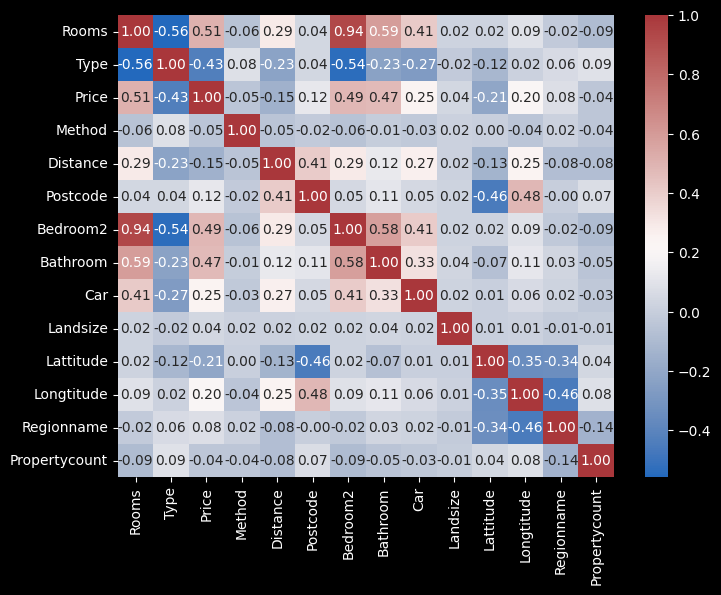

In [11]:
corr = data_encode.select_dtypes(exclude = ['object', 'datetime64[ns]']).corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot = True, cmap='vlag', fmt=".2f",)